<a href="https://colab.research.google.com/github/Sinamhd9/Computer-vision-projects/blob/main/Convolution/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution, zero padding, Gausssian, derivative of gaussian, and Sobel

In [2]:
# Importing libraries
#!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import numpy as np
import cv2
from google.colab.patches import cv2_imshow



## 2D Convolution and zero padding


In [3]:

# Zero padding
def zero_padding(img, width):
  img_zero = np.zeros((img.shape[0]+2*width, img.shape[1]+2*width, img.shape[2]))
  img_zero[width:img.shape[0]+width, width:img.shape[1]+width, :] = img
  return img_zero

# Convolution
def convolve2D(image, filter, padding):
  image_zero = zero_padding(image, padding)
  m, n, k = image_zero.shape
  mf, nf = filter.shape
  img_conv = np.zeros((m-mf+1, n-nf+1, k))
  for i in range(m-mf+1):
    for j in range(n-nf+1):
      for z in range(k):
        img_conv[i, j, z] = np.sum(image_zero[i:i+mf, j:j+nf, z] * filter)
  return img_conv

## Gaussian

In [ ]:
# Defining filters
filt1 = (1/16) *np.array([[1, 2 , 1], [2, 4, 2], [1, 2, 1]])
filt2= (1/273) * np.array([[1, 4, 7, 4, 1], [4, 16, 26, 16, 4], [7, 26, 41, 26, 7], [4, 16, 26, 16, 4], [1, 4, 7, 4, 1]])

**Here, I load the images and test zero padding**

img1 zero padded shape: (572, 572, 3)


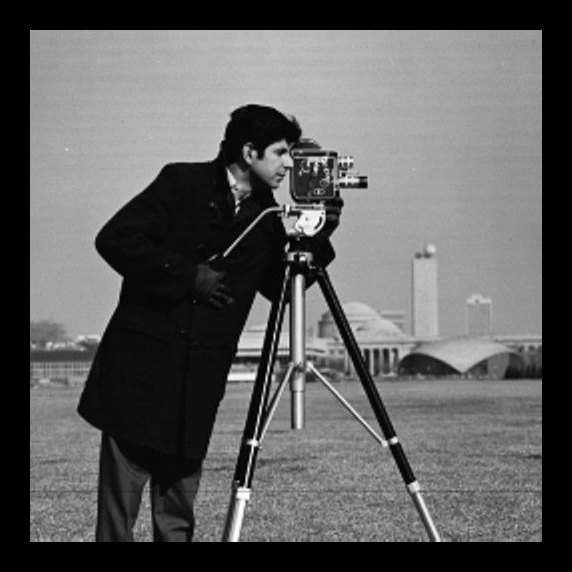

In [4]:
# Reading images
img1 = cv2.imread('filter1_img.jpg')
img2 = cv2.imread('filter2_img.jpg')

# Testing zero padding
img1_zero = zero_padding(img1, 30)
print('img1 zero padded shape:', img1_zero.shape)
cv2_imshow(img1_zero)

### Results on Image 1
**Please note in all images left is before and right is after the filter.**

#### Filter 1

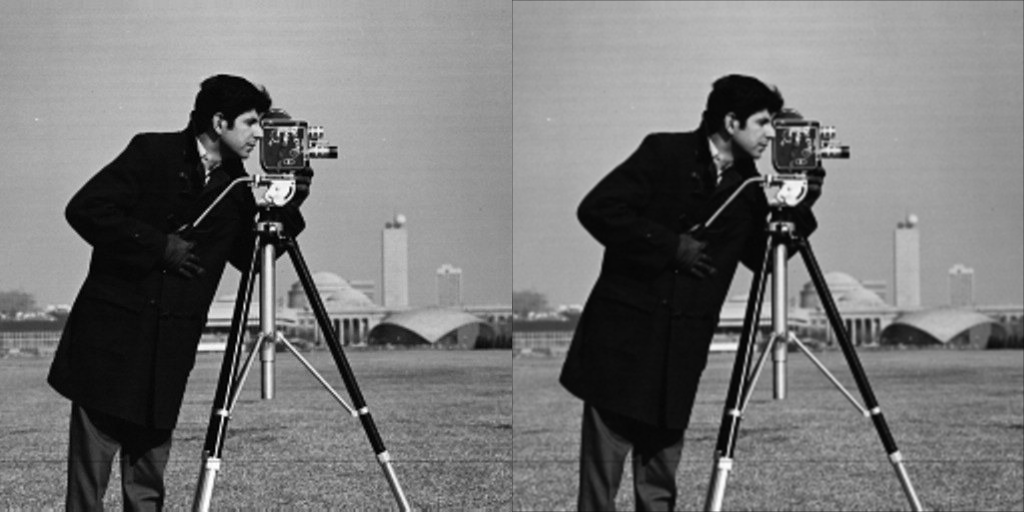

In [5]:
img1_filt1 = convolve2D(img1, filt1, 1)
result1 = np.concatenate((img1, img1_filt1), axis=1)
cv2_imshow(result1)


#### Filter 2

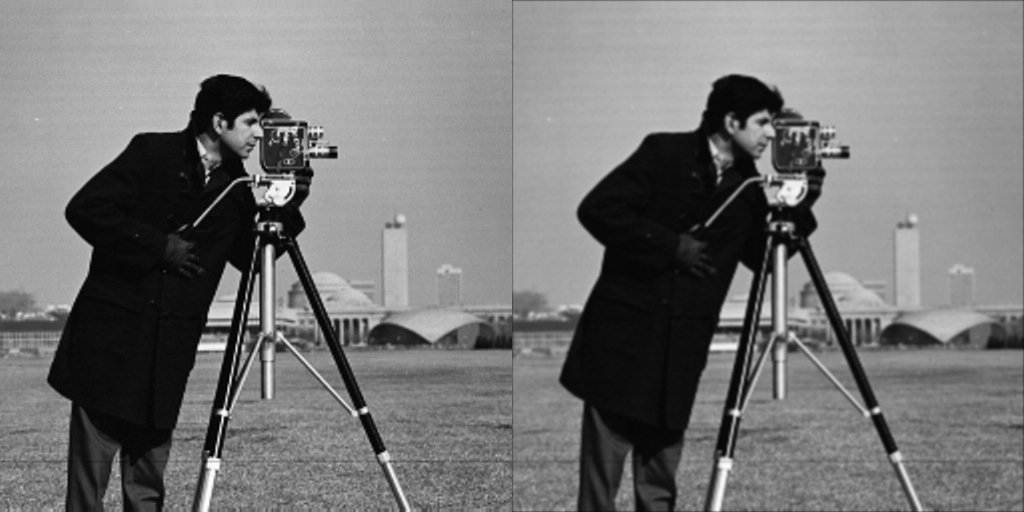

In [6]:
img1_filt2 = convolve2D(img1, filt2, 2)
result2 = np.concatenate((img1, img1_filt2), axis=1)
cv2_imshow(result2)

### Results on Image 2


#### Filter 1

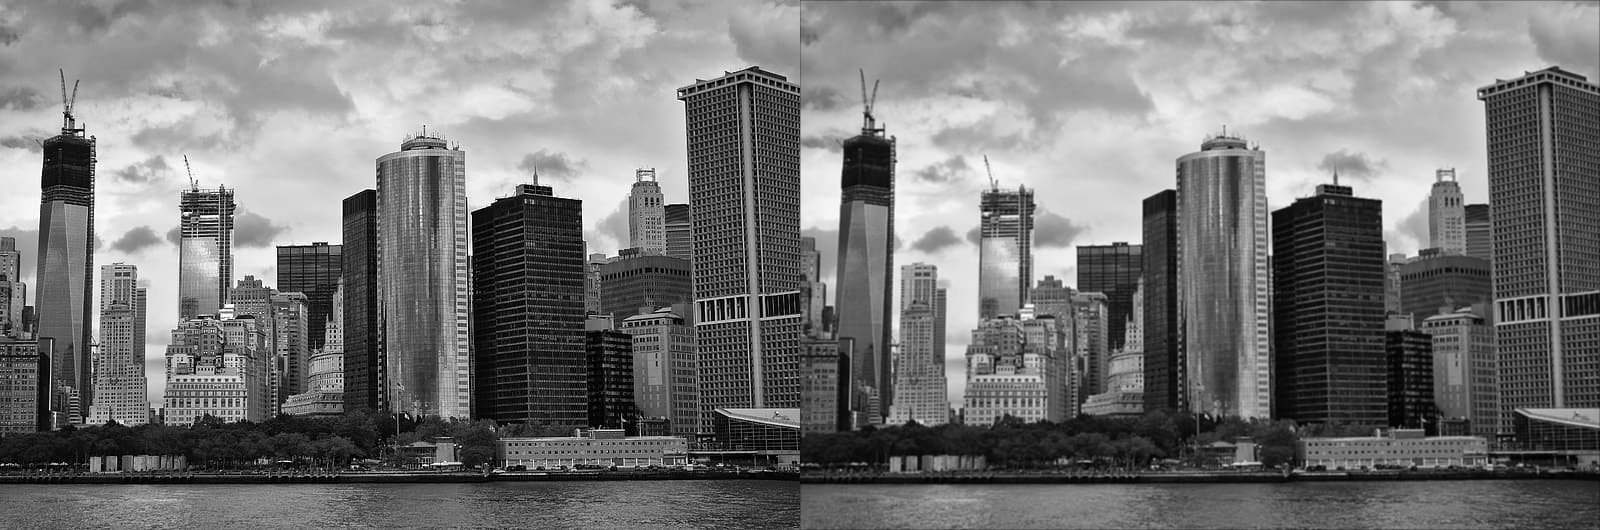

In [7]:
img2_filt1 = convolve2D(img2, filt1, 1)
result3 = np.concatenate((img2, img2_filt1), axis=1)
cv2_imshow(result3)


#### Filter 2

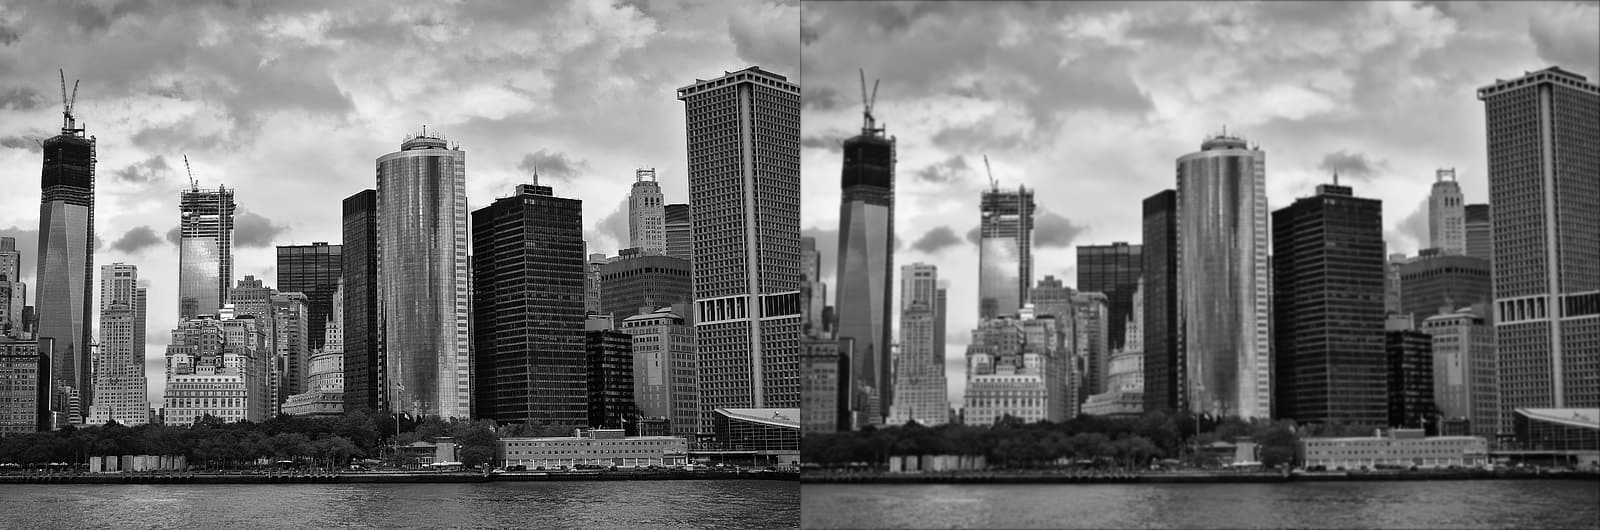

In [8]:
img2_filt2 = convolve2D(img2, filt2, 2)
result4 = np.concatenate((img2, img2_filt2), axis=1)
cv2_imshow(result4)


## Derivative of Gaussian

In [9]:
# Defining DoGs
gx = np.array([[1,0 , -1],[2,0, -2], [1,0, -1]])
gy = np.array([[1, 2, 1],[0, 0, 0], [-1, -2, -1]])

### Results 
**Please note in all images left is before and right is after the filter.**

#### Image 1

##### **gx**

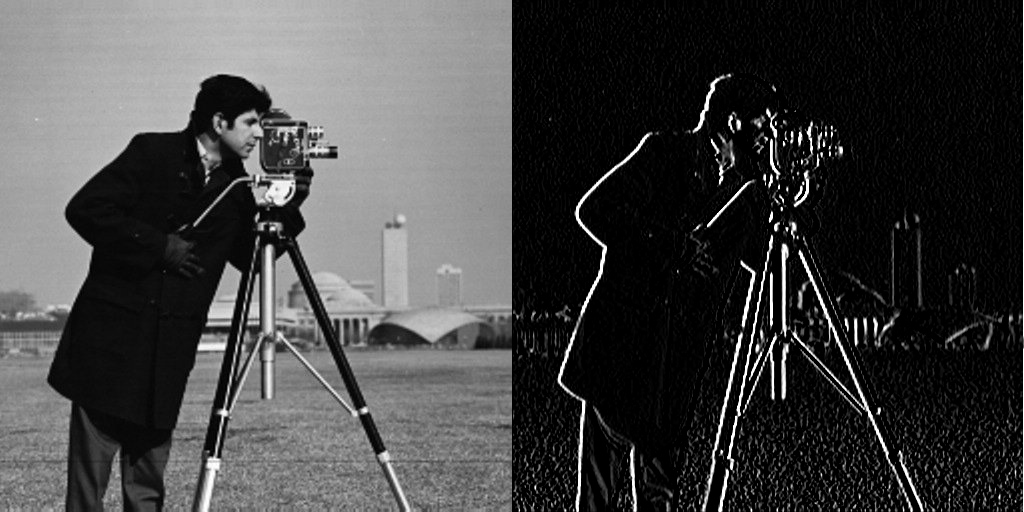

In [10]:
img1_filtDoGx = convolve2D(img1, gx, 1)
res_img1_filtDoGx = np.concatenate((img1, img1_filtDoGx), axis=1)
cv2_imshow(res_img1_filtDoGx)



##### **gy**

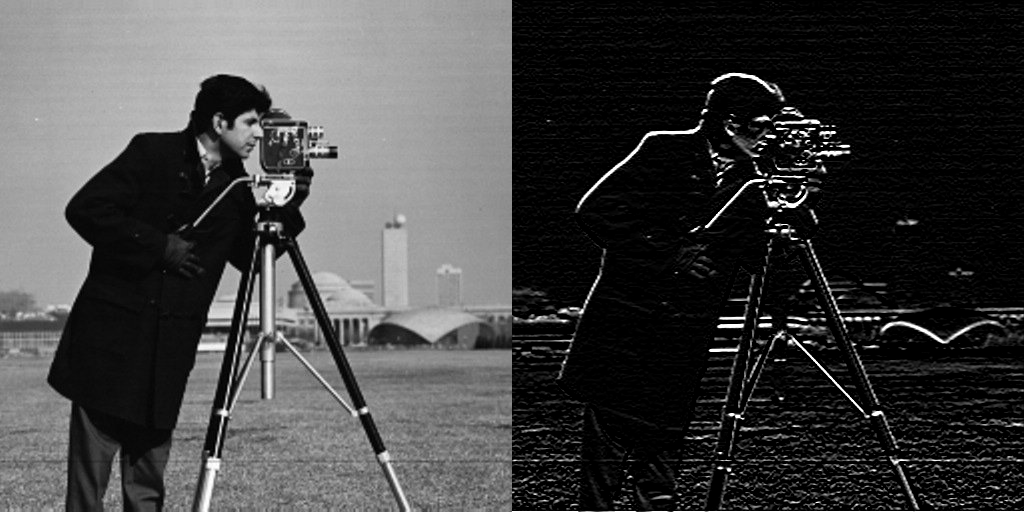

In [11]:
img1_filtDoGy = convolve2D(img1, gy, 1)
res_img1_filtDoGx = np.concatenate((img1, img1_filtDoGy), axis=1)
cv2_imshow(res_img1_filtDoGx)

#### Image 2



##### **gx**

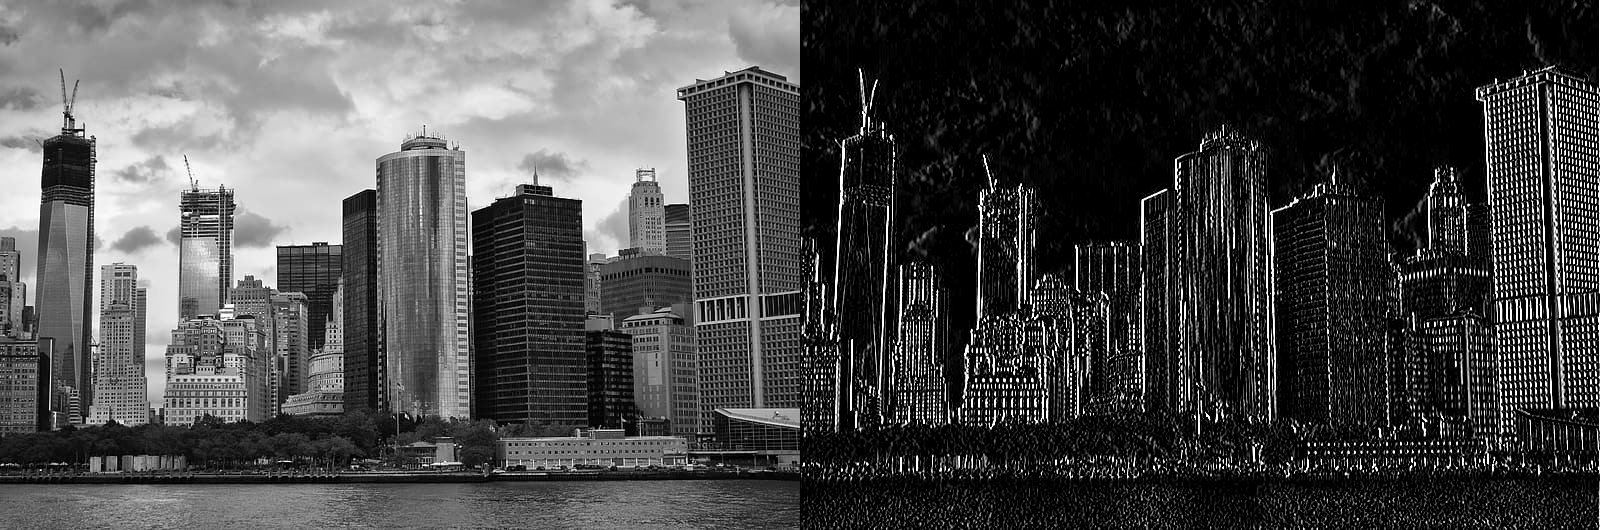

In [12]:
img2_filtDoGx = convolve2D(img2, gx, 1)
res_mg2_filtDoGx = np.concatenate((img2, img2_filtDoGx), axis=1)
cv2_imshow(res_mg2_filtDoGx)

##### **gy**

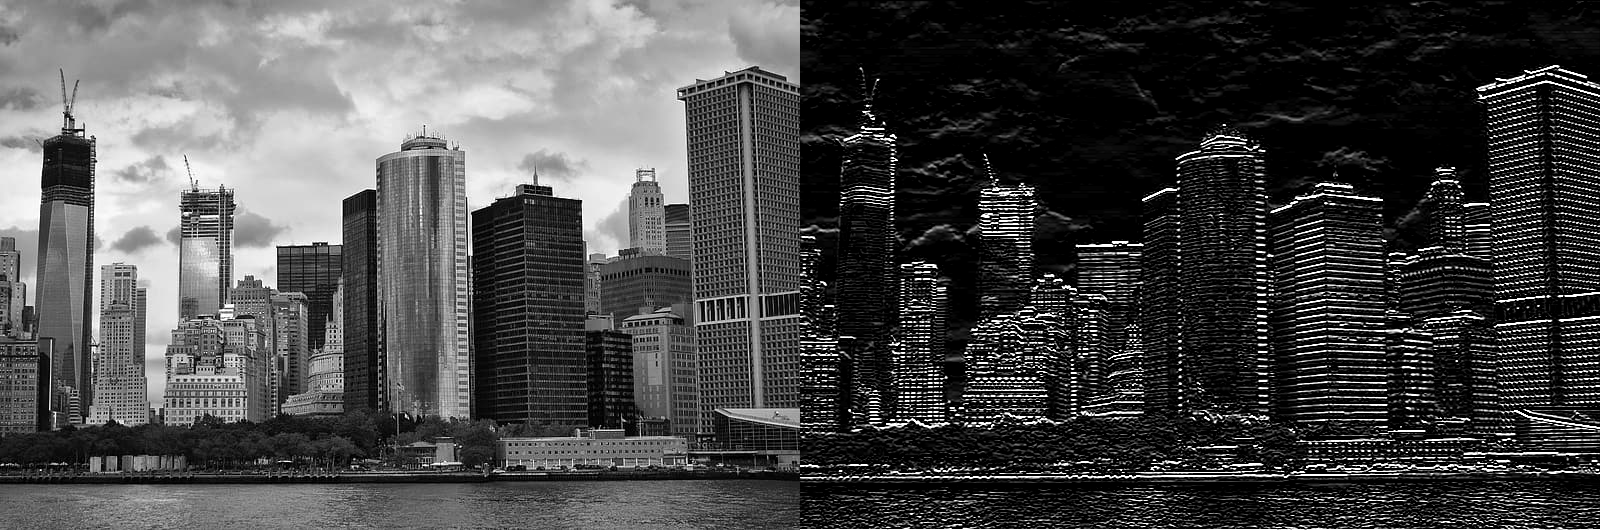

In [13]:
img2_filtDoGy = convolve2D(img2, gy, 1)
res_img2_filtDoGy = np.concatenate((img2, img2_filtDoGy), axis=1)
cv2_imshow(res_img2_filtDoGy)


## Sobel

Now Sobel filter is implemented based on the DoGs. 

### Results
**Please note in all images left is before and right is after the filter.**


#### Image 1


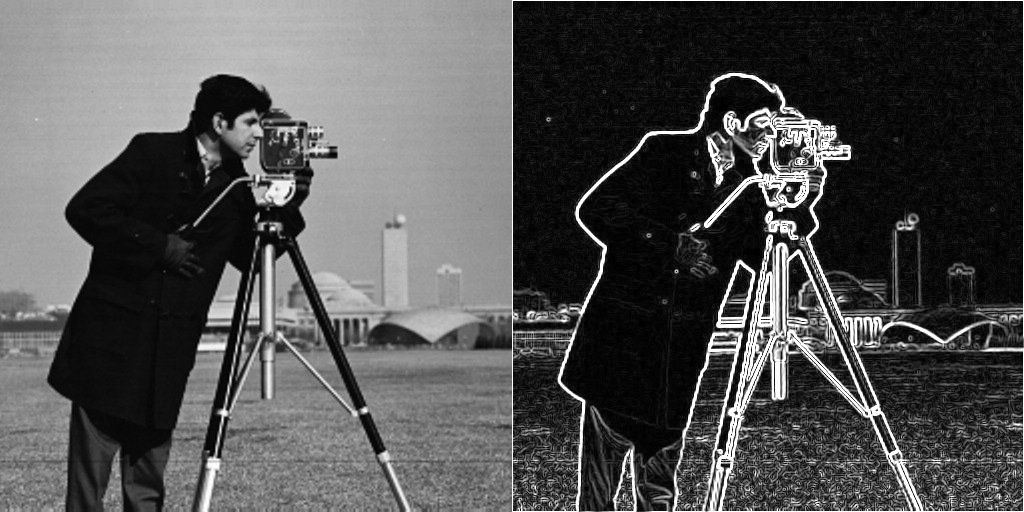

In [14]:
img1_sobel = np.sqrt(img1_filtDoGx**2 + img1_filtDoGy**2)
res_img1_sobel = np.concatenate((img1, img1_sobel), axis=1)
cv2_imshow(res_img1_sobel)

#### Image 2


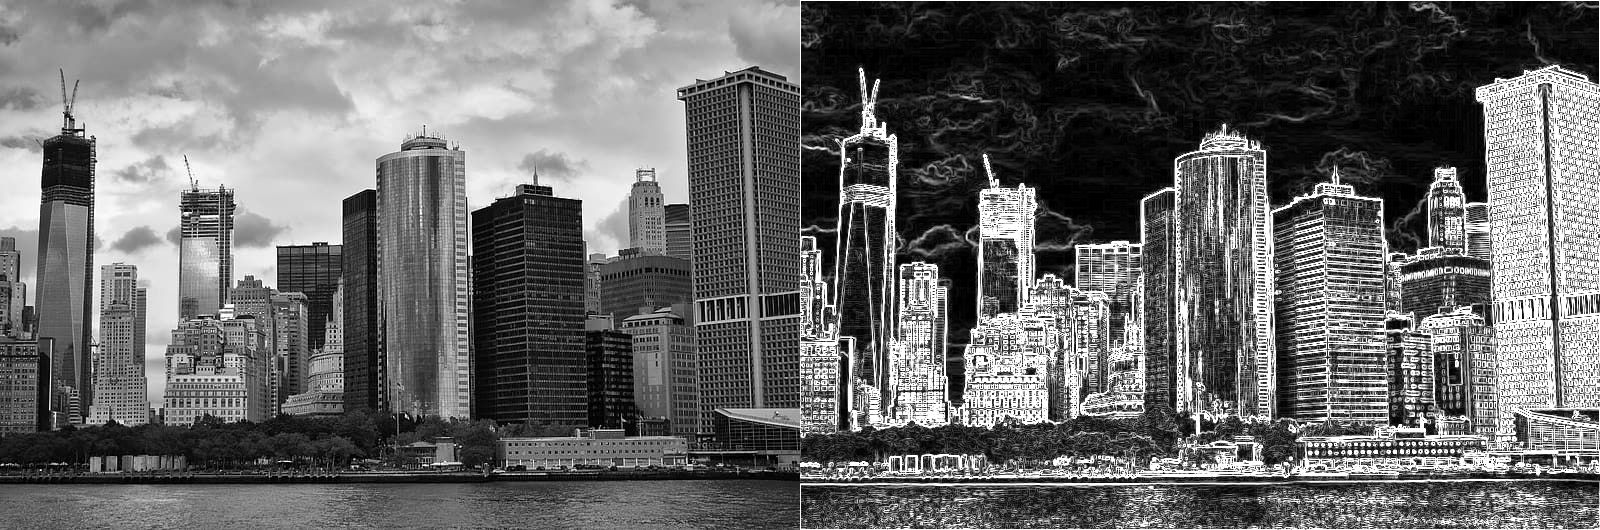

In [15]:
img2_sobel = np.sqrt(img2_filtDoGx**2 + img2_filtDoGy**2)
res_img2_sobel = np.concatenate((img2, img2_sobel), axis=1)
cv2_imshow(res_img2_sobel)